In [2]:
import eia
from collections import defaultdict
import pandas as pd
import plotly.express as px

In [3]:
df = eia.loaders.load_dataframe(data="electric-power-operational-data")

/Users/nehamittal/data/eia-py/data/csv/electric-power-operational-data_data.csv


In [4]:
df_all_sectors = df.loc[df["sectorDescription"] == "All Sectors", :]

In [16]:
df["sectorDescription"].unique()

array(['Electric Power', 'IPP Non-CHP', 'Electric Utility', 'All Sectors',
       'Independent Power Producers', 'All Commercial', 'All Industrial',
       'Industrial Non-CHP', 'IPP CHP', 'Commercial Non-CHP',
       'Commercial CHP', 'Electric Power Sector Non-CHP',
       'Industrial CHP', 'Residential', 'Coal Consumption'], dtype=object)

In [5]:
len(df_all_sectors)

719

In [6]:
df_all_sectors.head()

,Unnamed: 0,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units,...,cost,cost-units,cost-per-btu,cost-per-btu-units,sulfur-content,sulfur-content-units,ash-content,ash-content-units,heat-content,heat-content-units
18,18,2021-09,ESC,East South Central,99,All Sectors,ALL,all fuels,30034.90687,thousand megawatthours,...,NaN,dollars per physical units,NaN,dollars per million Btu,0.00,percent,0.00,percent,0.0000,Btu per physical units
98,98,2021-07,ESC,East South Central,99,All Sectors,REN,renewable,3085.42994,thousand megawatthours,...,NaN,dollars per physical units,NaN,dollars per million Btu,0.00,percent,0.00,percent,8.6001,Btu per physical units
99,99,2021-07,ESC,East South Central,99,All Sectors,RFO,residual fuel oil,NaN,thousand megawatthours,...,NaN,dollars per short tons,NaN,dollars per million Btu,0.00,percent,0.00,percent,6.1730,Btu per short tons
100,100,2021-07,ESC,East South Central,99,All Sectors,SPV,solar photovoltaic,121.41477,thousand megawatthours,...,NaN,dollars per physical units,NaN,dollars per million Btu,0.00,percent,0.00,percent,0.0000,Btu per physical units
101,101,2021-07,ESC,East South Central,99,All Sectors,SUB,subbituminous coal,3247.41809,thousand megawatthours,...,NaN,dollars per short tons,NaN,dollars per million Btu,0.29,percent,5.15,percent,17.9486,Btu per short tons


In [7]:
all_fuels = ['all fuels', 'renewable', 'residual fuel oil',
       'solar photovoltaic', 'subbituminous coal', 'solar',
       'estimated total solar photovoltaic', 'other renewables', 'other',
       'petroleum coke', 'petroleum liquids', 'all renewables', 'biomass',
       'bituminous coal and synthetic coal', 'lignite coal',
       'municiapl landfill gas', 'natural gas',
       'natural gas & other gases', 'nuclear', 'petroleum',
       'refined coal', 'other gases', 'fossil fuels',
       'hydro-electric pumped storage', 'conventional hydroelectric',
       'landfill gas', 'estimated total solar',
       'renewable waste products', 'wind', 'onshore wind turbine',
       'wood and wood wastes', 'waste oil and other oils',
       'bituminous coal', 'coal, excluding waste coal',
       'all coal products', 'distillate fuel oil',
       'estimated small scale solar photovoltaic', 'waste coal',
       'geothermal', 'biogenic municipal solid waste', 'solar thermal',
       'offshore wind turbine']

In [8]:
top_n_fuels = ['natural gas', 'all coal products', 'renewable', 'nuclear']

In [9]:
df_all_sectors_f = df_all_sectors.query("fuelTypeDescription in @top_n_fuels")

In [10]:
df_all_sectors_r = df_all_sectors_f[['period', 'location', 'stateDescription','fueltypeid', 'fuelTypeDescription', 'total-consumption-btu', 'consumption-for-eg-btu','consumption-uto-btu']].dropna()

In [11]:
consumption_by_source_data = pd.DataFrame(df_all_sectors_r.groupby(["period", "fuelTypeDescription"]).sum())

In [12]:
consumption_by_source_data = consumption_by_source_data.reset_index()

In [17]:
consumption_by_source_data= consumption_by_source_data[consumption_by_source_data["period"]!='2022-04']

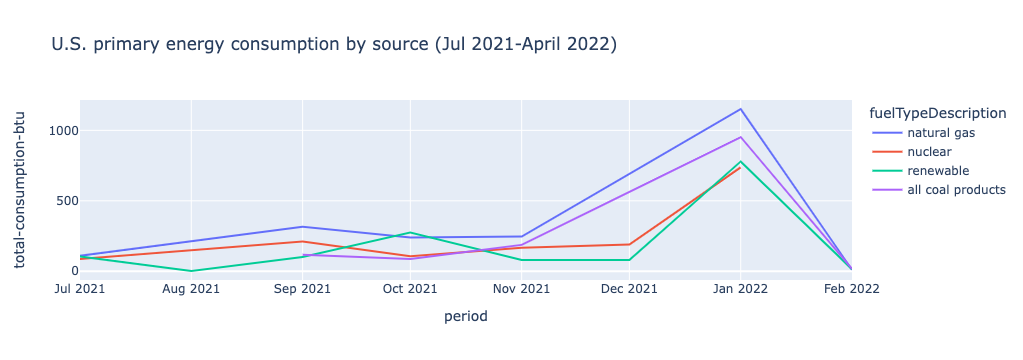

In [18]:
fig = px.line(consumption_by_source_data, x="period", y="total-consumption-btu", color='fuelTypeDescription', title='U.S. primary energy consumption by source (Jul 2021-April 2022)')
fig.show()

In [209]:
df["stateDescription"].unique()

array(['South Dakota', 'West South Central', 'East South Central',
       'Colorado', 'Maryland', 'Middle Atlantic', 'New England',
       'Pacific Contiguous', 'Iowa', 'Wisconsin', 'Washington',
       'Mountain', 'South Atlantic', 'Tennessee', 'Vermont', 'Arkansas',
       'West North Central', 'California', 'Texas', 'Alabama',
       'Pacific Noncontiguous', 'Alaska', 'Pacific', 'U.S. Total',
       'Arizona', 'Pennsylvania', 'Puerto Rico', 'Connecticut', 'Utah',
       'Indiana', 'South Carolina', 'Kansas', 'Kentucky', 'Maine',
       'Rhode Island', 'Idaho', 'Florida'], dtype=object)

In [137]:
all_sectors = ['Electric Power', 'IPP Non-CHP',
       'Independent Power Producers', 'All Commercial', 'All Industrial', 'Commercial Non-CHP',
       'Commercial CHP', 'Electric Power Sector Non-CHP',
       'Industrial CHP', 'Residential', 'Coal Consumption']

In [138]:
sectors = ['All Commercial', 'Residential', 'All Industrial']

In [190]:
df_c = df.query("sectorDescription == 'All Commercial'")

In [191]:
df_natural_gas = df_c.query("fuelTypeDescription=='natural gas'")

In [192]:
df_natural_gas_r = df_natural_gas[['period', 'location', 'sectorDescription', 'stateDescription','fueltypeid', 'fuelTypeDescription', 'total-consumption-btu', 'consumption-for-eg-btu','consumption-uto-btu']].dropna()

In [193]:
nt_consumption_by_sector = pd.DataFrame(df_natural_gas_r.groupby(["period", "sectorDescription"]).sum())

In [194]:
nt_consumption_by_sector = nt_consumption_by_sector.reset_index()


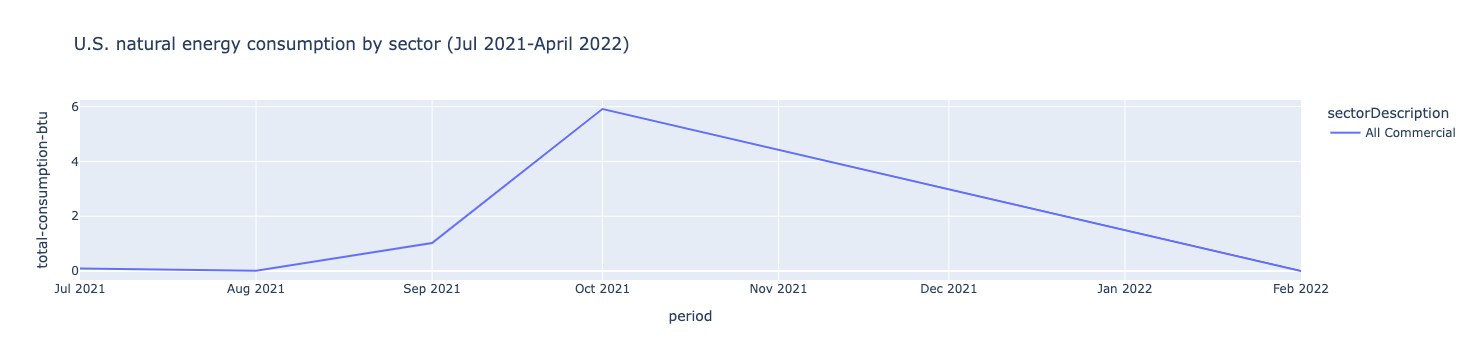

In [195]:
fig1 = px.line(nt_consumption_by_sector, x="period", y="total-consumption-btu", color='sectorDescription', title='U.S. natural energy consumption by sector (Jul 2021-April 2022)')
fig1.show()

In [203]:
df_i = df.query("sectorDescription == 'Electric Power'")

In [204]:
df_natural_gas_i = df_i.query("fuelTypeDescription=='natural gas'")

In [205]:
df_natural_gas_i = df_natural_gas_i[['period', 'location', 'sectorDescription', 'stateDescription','fueltypeid', 'fuelTypeDescription', 'total-consumption-btu', 'consumption-for-eg-btu','consumption-uto-btu']].dropna()

In [206]:
nt_consumption_ind_sector = pd.DataFrame(df_natural_gas_i.groupby(["period", "sectorDescription"]).sum())

In [207]:
nt_consumption_ind_sector = nt_consumption_ind_sector.reset_index()

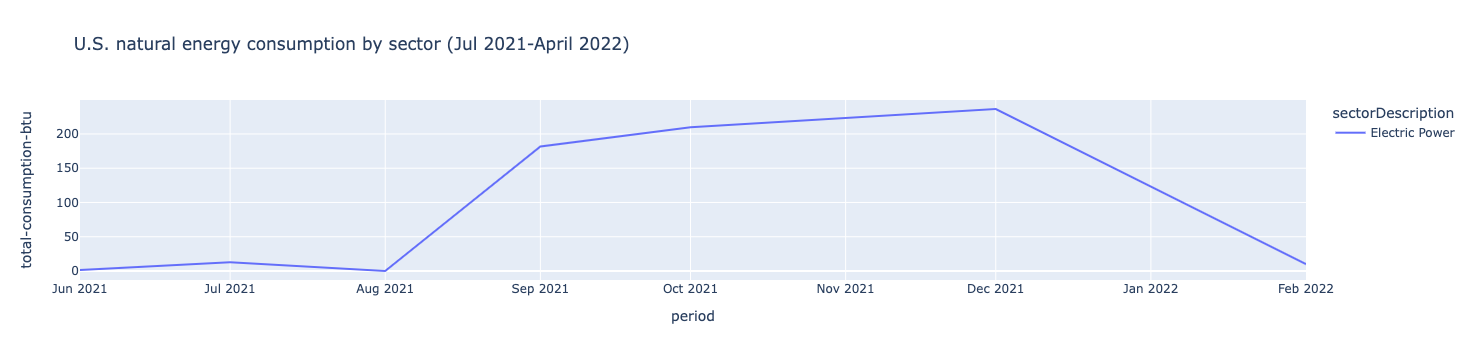

In [208]:
fig2 = px.line(nt_consumption_ind_sector, x="period", y="total-consumption-btu", color='sectorDescription', title='U.S. natural energy consumption by sector (Jul 2021-April 2022)')
fig2.show()